# Graphical Methods

::: {#exm-wmnhealthsurvey}
## Women's Health (Survey Graphing)

Let us take a look again at the nutrition data. In 1985, the USDA commissioned a study of women’s nutrition. Nutrient intake was measured for a random sample of 737 women aged 25-50 years. The following variables were measured:

-   Calcium(mg)
-   Iron(mg)
-   Protein(g)
-   Vitamin A(μg)
-   Vitamin C(mg)

We can read the data from the SAS file below. Various transformed variables are also created at this step for inspection. Here are some different ways we could take a look at this data graphically using SAS (and Minitab).

Download the SAS program: [nutrient2.sas](Data_files/nutrient2.sas){download="" target="_blank"}
:::

## Univariate Cases {.unnumbered .unlisted}

Using ***Histograms*** we can:

-   Assess Normality
-   Find Normalizing Transformations
-   Detect Outliers

Here we have a histogram (produced in SAS) for the daily intake of calcium. Note that the data appear to be skewed to the right, suggesting that calcium is not normally distributed. This suggests that a normalizing transformation should be considered.

> Example: Nutrient Intake Data - Descriptive Statistics The UNIVARIATE Procedure

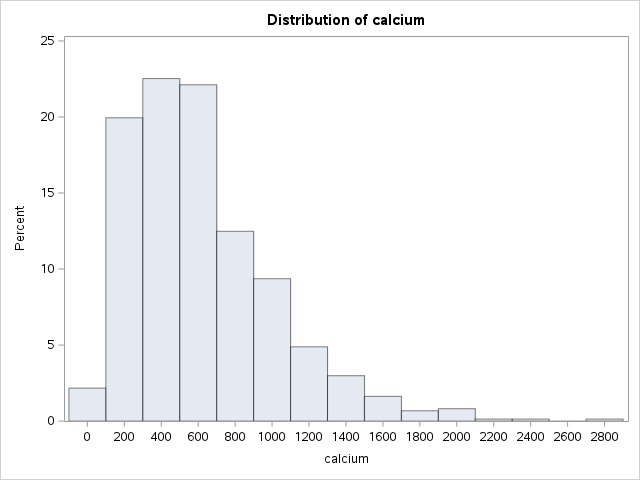

Common transformations include:

-   Square Root (often used with counts data)
-   Quarter Root
-   Log (either natural or base 10)

The square root transformation is the weakest of the above transformations, while the log transformation is the strongest. In practice, it is generally a good idea to try all three transformations to see which appears to yield the most symmetric distribution.

The following shows histograms for the raw data (calcium), square-root transformation (S_calciu), quarter-root transformation (S_S_calc), and log transformation (L_calciu). With increasingly stronger transformations of the data, the distribution shifts from being skewed to the right to being skewed to the left. Here, the square-root transformed data is still slightly skewed to the right, suggesting that the square-root transformation is not strong enough. In contrast, the log-transformed data are skewed to the left, suggesting that the log transformation is too strong. The quarter-root transformation results in the most symmetric distribution, suggesting that this transformation is most appropriate for this data.

::: {layout="[50,50]" layout-valign="center"}
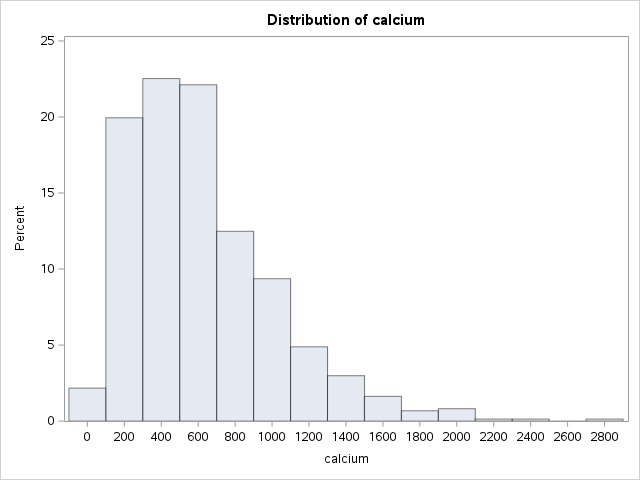

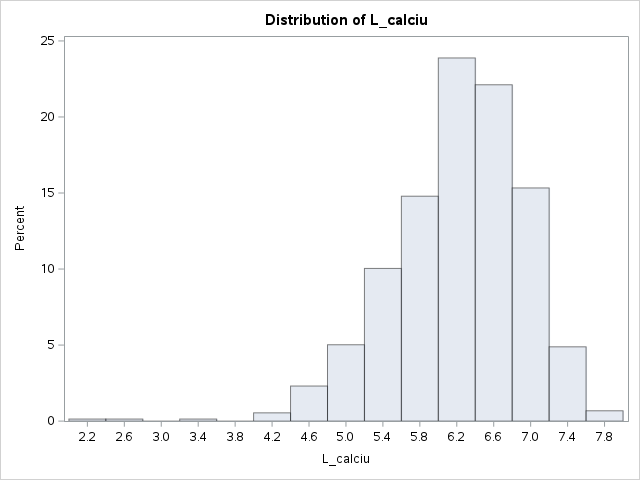

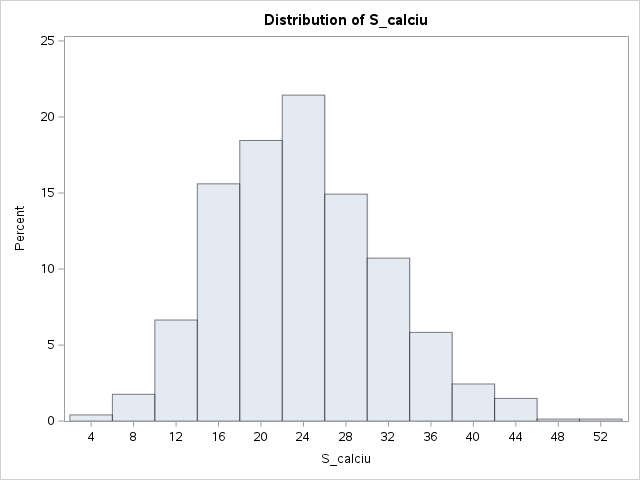

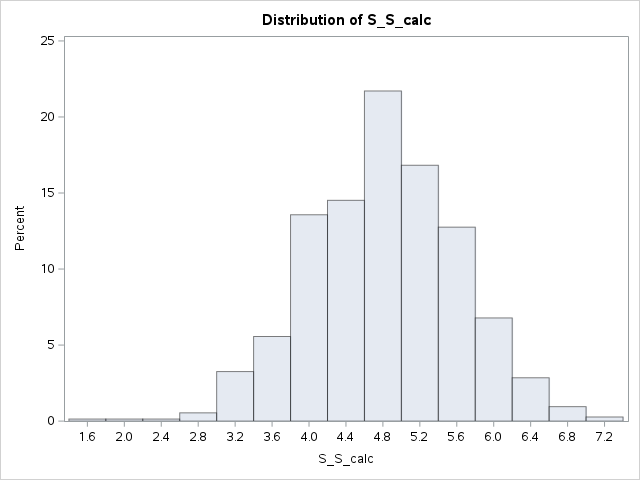
:::

In practice, histograms should be plotted for each of the variables, and transformations should be applied as needed. There is no 'best' transformation for all datasets.

## Bivariate Cases Section {.unnumbered .unlisted}

Using Scatter Plots we can: \* Describe relationships between pairs of variables \* Assess linearity \* Find Linearizing Transformations \* Detect Outliers

Here we have a scatterplot (produced in Minitab) in which calcium is plotted against iron. This plot suggests that the daily intake of calcium tends to increase with the increasing daily intake of iron. If the data have a bivariate normal distribution, then the scatterplot should be approximately elliptical. However, the points appear to fan out from the origin, suggesting that the data are not bivariate normal.

After applying quarter-root transformations to calcium and iron, we obtain a scatter of points that appear more elliptical. Moreover, it appears that the relationship between the transformed variables is approximately linear. The point in the lower left-hand corner appears to be an unusual observation or outlier. Upon closer examination, it was found that this woman reported zero daily intake of iron. Since this is very unlikely to be correct, we might justifiably remove this observation from the data set.

### Outliers {.unnumbered .unlisted}

::: {.callout-caution appearance="minimal"}

*Note!* It is not appropriate to remove an observation from the data just because it is an outlier. Consider, for example, the ozone hole in the Antarctic. For years, NASA had been flying polar-orbiting satellites designed to measure ozone in the upper atmosphere without detecting an ozone hole. Then, one day, a scientist visiting the Antarctic pointed an instrument straight-up into the sky and found evidence of an ozone hole. What happened? It turned out that the software used to process the NASA satellite data had a routine for automatically removing outliers. In this case, all observations with unusually low ozone levels were automatically removed by this routine. A close review of the raw, preprocessed data confirmed that there was an ozone hole.

:::

The above is a special case, where the outliers are the most interesting observations. In general, outliers are removed only if there is a compelling reason to believe that something is wrong with the individual observations; e.g. if the observation is deemed to be impossible, as in the case of zero daily intakes of iron. This underscores the need to have good field or lab notes with details on the data collection process. Lab notes may indicate that something may have gone wrong with an individual observation; e.g., a laboratory sample may have been dropped on the floor leading to contamination. If such a sample results in an outlier, then that sample may legitimately be removed from the data.

Outliers often have a greater influence on the results of data analyses than the remaining observations. For example, outliers have a strong influence on the calculation of the sample mean. If outliers are detected, and there is no corroborating evidence to suggest that they should be removed, then resistant statistical techniques should be applied. Here, by resistant techniques, we mean techniques or processes that are not easily influenced by outliers. For example, the sample median is not sensitive to outliers, and so may be calculated in place of the sample mean, if we believe that there is a possibility that the sample mean may give a wrong picture. Outlier-resistant methods go well beyond the scope of this course. If outliers are detected, then you should consult with a statistician.

## Trivariate Cases {.unnumbered .unlisted}

Using Rotating Scatter Plots we can:

-   Describe relationships among three variables
-   Detect Outliers

### Using Technology {.unnumbered .unlisted}

::: panel-tabset
## SAS Example

Using rotating scatter plots in SAS:


In [ ]:
#| code-fold: true
#| code-summary: "Show the code"
#| eval: false

options ls=78;
title "Example: Nutrient Intake Data - Descriptive Statistics";
data nutrient; infile "D:\Statistics\STAT 505\data\nutrient.csv" firstobs=2 delimiter=',';
input id calcium iron protein a c;
L_calciu = log(calcium); S_calciu = calcium**.5;
S_S_calc = calcium**.25;
L_iron = log(iron);
S_S_iron = iron**.25;
L_prot = log(protein);
S_S_prot = protein**.25;
S_S_a = a**.25;
S_S_c = c**.25;
run;

proc univariate data=nutrient;
histogram calcium S_calciu S_S_calc L_calciu;
run;

proc g3d data=nutrient;
scatter iron\*protein=calcium / rotate=60;
run;
quit;

proc corr data=nutrient plots(maxpoints=75000)=matrix;
var S_S_calc S_S_iron S_S_prot S_S_a S_S_c;
run;

## Minitab Example


{{< kbd Graph >}}


<kbd> Graph </kbd>
:::